# Derive consensus gene modules from many samples

In [5]:
library(KernSmooth)
library(reshape2)
library(Rtsne)

library(ggplot2)
library(RColorBrewer)
library(gplots)
library(ggrepel)
library(pheatmap)
library(ComplexHeatmap)
library(dplyr)
library(plyr)
library(DescTools)

library(Seurat)
library(matrixStats)
library(tidyr)
library(igraph)

library(dbscan)
library(parallel)
library(uwot)


source("../sc_analysis_palettes_and_helpers.r")

wd <- './consensus_modules_R/'


## Correlate modules from individual datasets

### load gene scores from cNMF

#### for individual primary tumors

In [6]:
sample_type <- 'pts_allindividually'

# Load table of sample names with assigned best k (number of modules)
sample_ks <- read.delim("sample_ks.csv", sep = ';', stringsAsFactors = F)


In [11]:

for(i in 1:nrow(sample_ks)){
    
    tum_name <- sample_ks$sample[i]
    
    k <- sample_ks$best_in_5to15[i]
    
    gene_scores <- t(read.delim(paste0('./nmf_data/out/',tum_name,'_seurVarGenes/',tum_name,'_seurVarGenes.gene_spectra_score.k_',k,'.dt_0_1.txt'), header = T, sep = '\t', row.names = 1))

    gene_scores <- gene_scores[order(rownames(gene_scores)),]    
    
    colnames(gene_scores) <- paste0(tum_name,"_",colnames(gene_scores))
    
    
    if(i == 1){
    
        all_scores <- gene_scores
        
    }else{
        
        all_scores <- all_scores[rownames(all_scores) %in% rownames(gene_scores),]
        gene_scores <- gene_scores[rownames(gene_scores) %in% rownames(all_scores),]
        gene_scores <- gene_scores[rownames(all_scores),]
        

        all_scores <- cbind(all_scores, gene_scores)
        
    }
    
}

all_scores <- as.data.frame(all_scores)
rownames(all_scores) <- rownames(gene_scores)

write.table(all_scores, paste0(wd, '/', 'all_mod_genescores_',sample_type,'_df.csv'), quote = F, sep = ',')


#### for primary tumor MULTI-seq datasets

In [ ]:
sample_type <- 'multis_allindividually'

# Load table of sample names with assigned best k (number of modules)
sample_ks <- read.delim("sample_ks_multi.csv", sep = ';', stringsAsFactors = F)


In [ ]:

for(i in 1:nrow(sample_ks)){
    
    tum_name <- sample_ks$sample[i]
    
    k <- sample_ks$best_in_5to15[i]
    
    gene_scores <- t(read.delim(paste0('./nmf_data/out/',tum_name,'_seurVarGenes/',tum_name,'_seurVarGenes.gene_spectra_score.k_',k,'.dt_0_2.txt'), header = T, sep = '\t', row.names = 1))

    gene_scores <- gene_scores[order(rownames(gene_scores)),]    
    
    colnames(gene_scores) <- paste0(tum_name,"_",colnames(gene_scores))
    
    
    if(i == 1){
    
        all_scores <- gene_scores
        
    }else{
        
        all_scores <- all_scores[rownames(all_scores) %in% rownames(gene_scores),]
        gene_scores <- gene_scores[rownames(gene_scores) %in% rownames(all_scores),]
        gene_scores <- gene_scores[rownames(all_scores),]
        

        all_scores <- cbind(all_scores, gene_scores)
        
    }
    
}

all_scores <- as.data.frame(all_scores)
rownames(all_scores) <- rownames(gene_scores)

write.table(all_scores, paste0('all_mod_genescores_',sample_type,'_df.csv'), quote = F, sep = ',')


#### for individual early allograft datasets

In [ ]:
sample_type <- 'earlyallos_allindividually'

# Load table of sample names with assigned best k (number of modules)
sample_ks <- read.delim("sample_ks_multi_earlyAllos.csv", sep = ';', stringsAsFactors = F)


In [ ]:

for(i in 1:nrow(sample_ks)){
    
    tum_name <- sample_ks$sample[i]
    
    k <- sample_ks$best_in_5to15[i]
    
    gene_scores <- t(read.delim(paste0('./nmf_data/out/',tum_name,'_seurVarGenes/',tum_name,'_seurVarGenes.gene_spectra_score.k_',k,'.dt_0_2.txt'), header = T, sep = '\t', row.names = 1))

    gene_scores <- gene_scores[order(rownames(gene_scores)),]    
    
    colnames(gene_scores) <- paste0(tum_name,"_",colnames(gene_scores))
    
    
    if(i == 1){
    
        all_scores <- gene_scores
        
    }else{
        
        all_scores <- all_scores[rownames(all_scores) %in% rownames(gene_scores),]
        gene_scores <- gene_scores[rownames(gene_scores) %in% rownames(all_scores),]
        gene_scores <- gene_scores[rownames(all_scores),]
        

        all_scores <- cbind(all_scores, gene_scores)
        
    }
    
}

all_scores <- as.data.frame(all_scores)
rownames(all_scores) <- rownames(gene_scores)

write.table(all_scores, paste0('all_mod_genescores_',sample_type,'_df.csv'), quote = F, sep = ',')


#### for individual late allograft tumors

In [ ]:
sample_type <- 'lateallos_allindividually'

# Load table of sample names with assigned best k (number of modules)
sample_ks <- read.delim("sample_ks_ind_lateAllos.csv", sep = ';', stringsAsFactors = F)


In [ ]:

for(i in 1:nrow(sample_ks)){
    
    tum_name <- sample_ks$sample[i]
    
    k <- sample_ks$best_in_5to15[i]
    
    gene_scores <- t(read.delim(paste0('./nmf_data/out/',tum_name,'_seurVarGenes/',tum_name,'_seurVarGenes.gene_spectra_score.k_',k,'.dt_0_1.txt'), header = T, sep = '\t', row.names = 1))

    gene_scores <- gene_scores[order(rownames(gene_scores)),]    
    
    colnames(gene_scores) <- paste0(tum_name,"_",colnames(gene_scores))
    
    
    if(i == 1){
    
        all_scores <- gene_scores
        
    }else{
        
        all_scores <- all_scores[rownames(all_scores) %in% rownames(gene_scores),]
        gene_scores <- gene_scores[rownames(gene_scores) %in% rownames(all_scores),]
        gene_scores <- gene_scores[rownames(all_scores),]
        

        all_scores <- cbind(all_scores, gene_scores)
        
    }
    
}

all_scores <- as.data.frame(all_scores)
rownames(all_scores) <- rownames(gene_scores)

write.table(all_scores, paste0('all_mod_genescores_',sample_type,'_df.csv'), quote = F, sep = ',')


### correlate scores

##### merge scores from all datasets

In [ ]:
# read scores back in
sample_type <- 'pts_allindividually'
all_scores_pts <- read.delim(paste0('all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
dim(all_scores_pts)

# read scores back in
sample_type <- 'lateallos_allindividually'
all_scores_late <- read.delim(paste0('all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
dim(all_scores_late)

# read scores back in
sample_type <- 'earlyallos_allindividually'
all_scores_early <- read.delim(paste0('all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
dim(all_scores_early)

# read scores back in
sample_type <- 'multis_allindividually'
all_scores_multi <- read.delim(paste0('all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
dim(all_scores_multi)

In [ ]:
# save entire dataframe
sample_type <- 'all_TPs_allindividually'

all_scores_pts <- all_scores_pts[rownames(all_scores_pts) %in% rownames(all_scores_late),]
all_scores_pts <- all_scores_pts[rownames(all_scores_pts) %in% rownames(all_scores_early),]
all_scores_late <- all_scores_late[rownames(all_scores_late) %in% rownames(all_scores_pts),]
all_scores_early <- all_scores_early[rownames(all_scores_early) %in% rownames(all_scores_pts),]
all_scores_multi <- all_scores_multi[rownames(all_scores_multi) %in% rownames(all_scores_pts),]

all_scores_pts <- all_scores_pts[order(rownames(all_scores_pts)),]
all_scores_late <- all_scores_late[order(rownames(all_scores_late)),]
all_scores_early <- all_scores_early[order(rownames(all_scores_early)),]
all_scores_multi <- all_scores_multi[order(rownames(all_scores_multi)),]

table(rownames(all_scores_pts) == rownames(all_scores_late))
table(rownames(all_scores_early) == rownames(all_scores_pts))
table(rownames(all_scores_multi) == rownames(all_scores_pts))


all_scores <- cbind(all_scores_pts, all_scores_late, all_scores_early, all_scores_multi)
dim(all_scores)

write.table(all_scores, paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), quote = F, sep = ',')


##### correlate

In [12]:
# Read scores back in. Set sample_type to load desired set of modules.
sample_type <- 'all_TPs_allindividually'

all_scores <- read.delim(paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")


In [ ]:
# Pairwise pearson correlation
# The function 'calculate_correlation' is a wrapper around function 'cor.test' and is called from sc_analysis_palettes_and_helpers.r.

ncores <- 35 # Adjust cores as needed for parallel processing

# Loop over all pairs of columns and compute the correlation coefficient and p-value using mclapply
results <- mclapply(1:ncol(all_scores), function(i) {
  calculate_correlation(i)
}  , mc.cores = ncores) # Adjust mc.cores as needed for parallel processing


In [ ]:
# Process results and adjust p-values for multiple testing

df_corr <- lapply(1:length(results), function(x) results[[x]]$loop_corr)
df_corr <- as.data.frame(do.call(cbind, df_corr))
colnames(df_corr) <- rownames(df_corr)

df_pval <- lapply(1:length(results), function(x) results[[x]]$loop_pval)
df_pcorr <- as.data.frame(unlist(df_pval))
df_pval <- as.data.frame(do.call(cbind, df_pval))
colnames(df_pval) <- rownames(df_pval)

# Adjust the p-values for multiple testing using the Bonferroni approach
df_pcorr$corr <- NA
                  
num_tests <- ncol(df_corr) * (ncol(df_corr) - 1) / 2
df_pcorr[,2] <- p.adjust(df_pcorr[,1], method = "fdr", n = nrow(df_pcorr))
colnames(df_pcorr) <- c("p_val", "FDR")
            

In [ ]:
# Save correlation coefficients, p-values and p-values adjusted for multiple testing

write.table(df_pcorr, paste0(wd,'all_mod_cor_correctedPVals_',sample_type,'_onlypos.csv'), quote = F, sep = ',')
write.table(df_corr, paste0(wd,'all_mod_cor_vals_',sample_type,'_onlypos.csv'), quote = F, sep = ',')
write.table(df_pval, paste0(wd,'all_mod_cor_pVals_',sample_type,'_onlypos.csv'), quote = F, sep = ',')


## Load correlation results and filter modules

### reload

In [14]:
# Reload correlation results. Set data_to_load to reload desired set of data.
data_to_load <- 'pts_allindividually'

# reload original score data
# reload correlation results

all_scores <- read.delim(paste0(wd,'all_mod_genescores_',data_to_load,'_df.csv'), stringsAsFactors = F, sep = ",")

df_pcorr <- read.delim(paste0(wd,'all_mod_cor_correctedPVals_',data_to_load,'_onlypos.csv'), stringsAsFactors = F, sep = ",")
df_corr <- read.delim(paste0(wd,'all_mod_cor_vals_',data_to_load,'_onlypos.csv'), stringsAsFactors = F, sep = ",")
df_pval <- read.delim(paste0(wd,'all_mod_cor_pVals_',data_to_load,'_onlypos.csv'), stringsAsFactors = F, sep = ",")

# set diagonal, i.e. self-correlation to NA
df_corr_na <- replace(df_corr, col(df_corr) == row(df_corr), NA)


In [15]:
# If loading data for all timepoints together first: create a column for the sample type

if(data_to_load == 'all_TPs_allindividually'){
    
        # read scores back in
        sample_type <- 'pts_allindividually'
        all_scores_pts <- read.delim(paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
        all_scores_pts <- as.data.frame(colnames(all_scores_pts))
        all_scores_pts$sample_type <- 'primary_tumours'
        colnames(all_scores_pts) <- c('module','sample_type')

        # read scores back in
        sample_type <- 'lateallos_allindividually'
        all_scores_late <- read.delim(paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
        all_scores_late <- as.data.frame(colnames(all_scores_late))
        all_scores_late$sample_type <- 'late_allos'
        colnames(all_scores_late) <- c('module','sample_type')

        # read scores back in
        sample_type <- 'earlyallos_allindividually'
        all_scores_early <- read.delim(paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
        all_scores_early <- as.data.frame(colnames(all_scores_early))
        all_scores_early$sample_type <- 'early_allos'
        colnames(all_scores_early) <- c('module','sample_type')
    
        # read scores back in
        sample_type <- 'multis_allindividually'
        all_scores_multi <- read.delim(paste0(wd,'all_mod_genescores_',sample_type,'_df.csv'), stringsAsFactors = F, sep = ",")
        all_scores_multi <- as.data.frame(colnames(all_scores_multi))
        all_scores_multi$sample_type <- 'primary_multiseq'
        colnames(all_scores_multi) <- c('module','sample_type')

        sample_type <- 'all_TPs_allindividually'

        mod_info <- rbind(all_scores_pts,all_scores_late,all_scores_early, all_scores_multi)
    
}


### specify sample_type to analyze
**one of:**
- all_TPs_allindividually (all together: different timepoints, individual and multi-seq)

- pts_allindividually (all modules from individual primary tumor samples)
- lateallos_allindividually (all modules from individual late allograft tumors)
- earlyallos_allindividually (all modules from individual early allograft datasets)
- multis_allindividually (all modules from primary tumor MULTI-seq datasets)
- all_TPs_singleTums (all individual primary tumor sample, late allograft tumor and early allograft modules)
- pts_singleTums_and_multis (all modules from individual primary tumor samples and primary tumor MULTI-seq runs)

In [16]:

sample_type <- 'pts_allindividually'

# subset if needed

if(data_to_load == 'all_TPs_allindividually'){
    
    if(sample_type == 'pts_allindividually'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type == 'primary_tumours'],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type == 'primary_tumours']]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type == 'primary_tumours'],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type == 'primary_tumours']]

    }else if(sample_type == 'lateallos_allindividually'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type == 'late_allos'],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type == 'late_allos']]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type == 'late_allos'],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type == 'late_allos']]

    }else if(sample_type == 'earlyallos_allindividually'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type == 'early_allos'],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type == 'early_allos']]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type == 'early_allos'],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type == 'early_allos']]

    }else if(sample_type == 'multis_allindividually'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type == 'primary_multiseq'],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type == 'primary_multiseq']]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type == 'primary_multiseq'],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type == 'primary_multiseq']]

    }else if(sample_type == 'all_TPs_singleTums'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','late_allos','early_allos')],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','late_allos','early_allos')]]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','late_allos','early_allos')],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','late_allos','early_allos')]]

    }else if(sample_type == 'pts_singleTums_and_multis'){
        df_corr <- df_corr[rownames(df_corr) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','primary_multiseq')],
                           colnames(df_corr) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','primary_multiseq')]]

        df_pval <- df_pval[rownames(df_pval) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','primary_multiseq')],
                           colnames(df_pval) %in% mod_info$module[mod_info$sample_type %in% c('primary_tumours','primary_multiseq')]]
    }

}

In [17]:
## Exchange p-values with adjusted p-values (FDR, saved in df_pcorr)

df_pval_corr <- lapply(df_pval, function(X) df_pcorr$FDR[match(X, df_pcorr$p_val)])
df_pval_corr <- as.data.frame(do.call(rbind, df_pval_corr))
colnames(df_pval_corr) <- colnames(df_pval)

df_pval_corr <- df_pval_corr[rownames(df_pval_corr) %in% colnames(all_scores),colnames(df_pval_corr) %in% colnames(all_scores)]
df_corr <- df_corr[rownames(df_corr) %in% colnames(all_scores),colnames(df_corr) %in% colnames(all_scores)]
df_pval <- df_pval[rownames(df_pval) %in% colnames(all_scores),colnames(df_pval) %in% colnames(all_scores)]


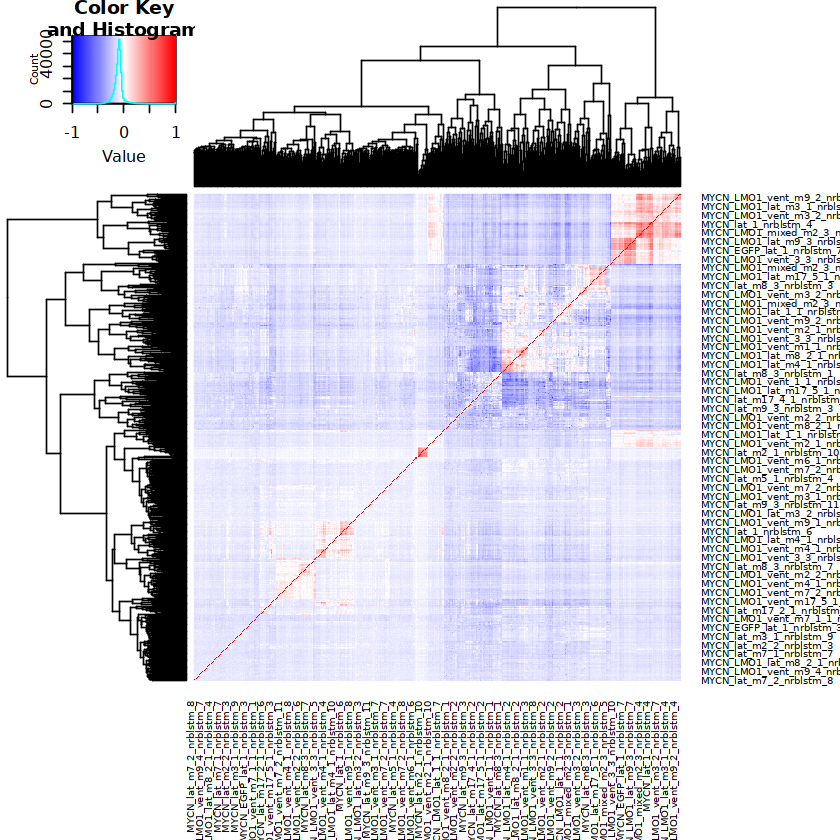

In [18]:
## Cluster modules based on correlations and visualize in a heatmap
hc <- hclust(dist(df_corr))
df_corr_clustered <- df_corr[rev(hc$order), rev(hc$order)]

# Plot the heatmap
heatmap.2(as.matrix(df_corr_clustered), trace = "none", col = colorRampPalette(c("blue", "white", "red"))(100), 
          key = TRUE, keysize = 1.2, dendrogram = "both", margins = c(8, 8), cex.main=0.6)

### filter modules

**Notes on filtering**

The following filtering parameters were used for different sets of datasets. They can be set in the next cell.  
Different sets of filtering cut-offs were tested and selected if leading to a reasonable list of module clusters.

|sample_type|cutoff_corr|cutoff_style|module_k|
|--|--|--|--|
|pts_allindividually|0.1|over cutoff with at least **two** others|18|
|multis_allindividually|0.1|over cutoff with at least **two** others|10|
|lateallos_allindividually|0.2|over cutoff with at least **two** others|10|
|earlyallos_allindividually|0.2|over cutoff with at least **two** others|7|


In [19]:
# set below cut-off
cutoff_corr <- 0.1 # correlation coefficient filtering cutoff


# Keep only modules that have a correlation of at least equal to cutoff_corr with at least two modules
df_corr_maxs_1 <- apply(df_corr_na, 2, function(x) max(x[x != max(x, na.rm = T)], na.rm = T))
          
df_corr_maxs_1 <- names(df_corr_maxs_1[df_corr_maxs_1 >= cutoff_corr])
                    
df_corr_maxs <- df_corr_maxs_1
                  
df_corr_filt <- df_corr[rownames(df_corr) %in% df_corr_maxs, colnames(df_corr) %in% df_corr_maxs]

                        
write.csv(df_corr_filt, paste0(wd, '/filtered_module_df_',sample_type,'.csv'), quote = F)


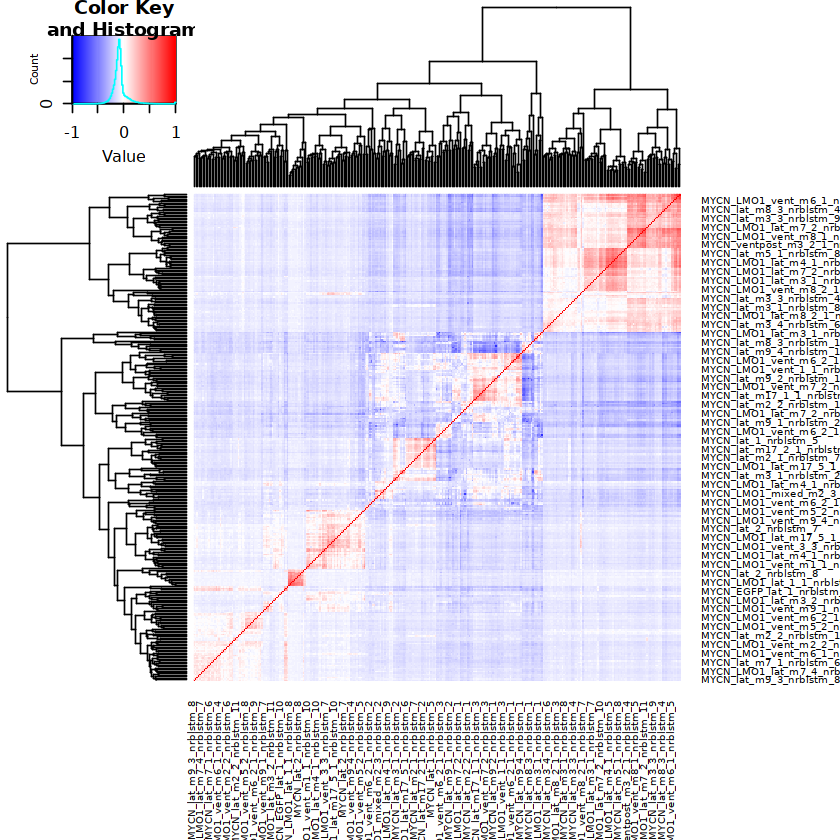

In [20]:
## Cluster selected modules based on correlations and visualize in a heatmap
hc <- hclust(dist(df_corr_filt))
df_corr_clustered <- df_corr_filt[rev(hc$order), rev(hc$order)]

heatmap.2(as.matrix(df_corr_clustered), trace = "none", col = colorRampPalette(c("blue", "white", "red"))(100), 
          key = TRUE, keysize = 1.2, dendrogram = "both", margins = c(8, 8), cex.main=0.6)


## Clustering modules with hdbscan

**Notes on clustering**

The following parameters were used for different sets of datasets. They can be set in the next cell.  

|sample_type|minPts|
|--|--|
|pts_allindividually|3|
|multis_allindividually|3|
|lateallos_allindividually|2|
|earlyallos_allindividually|2|


[1] 329

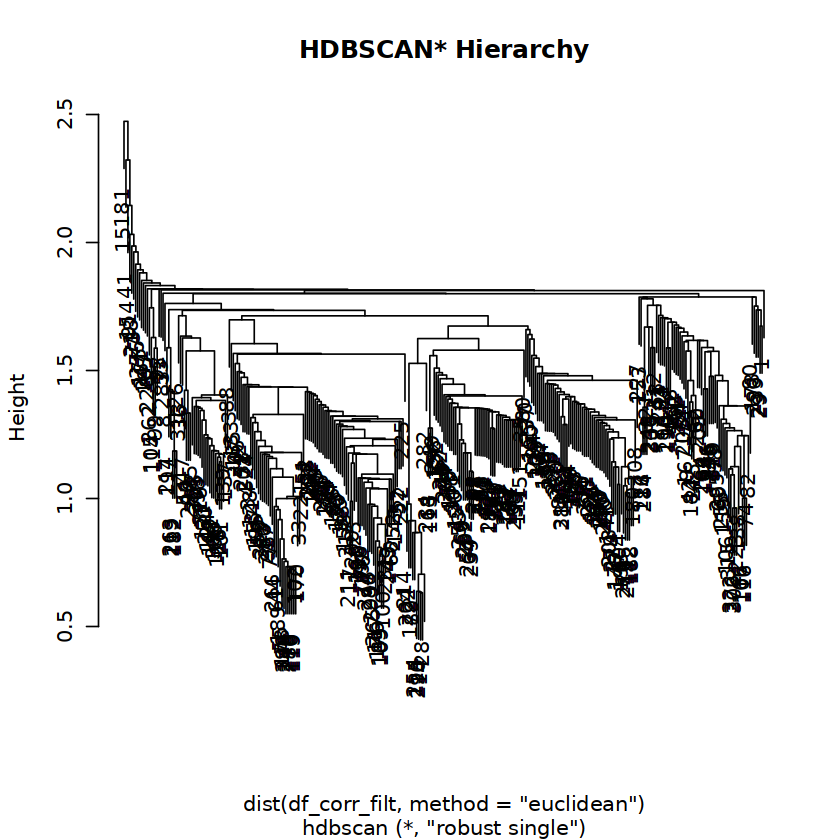

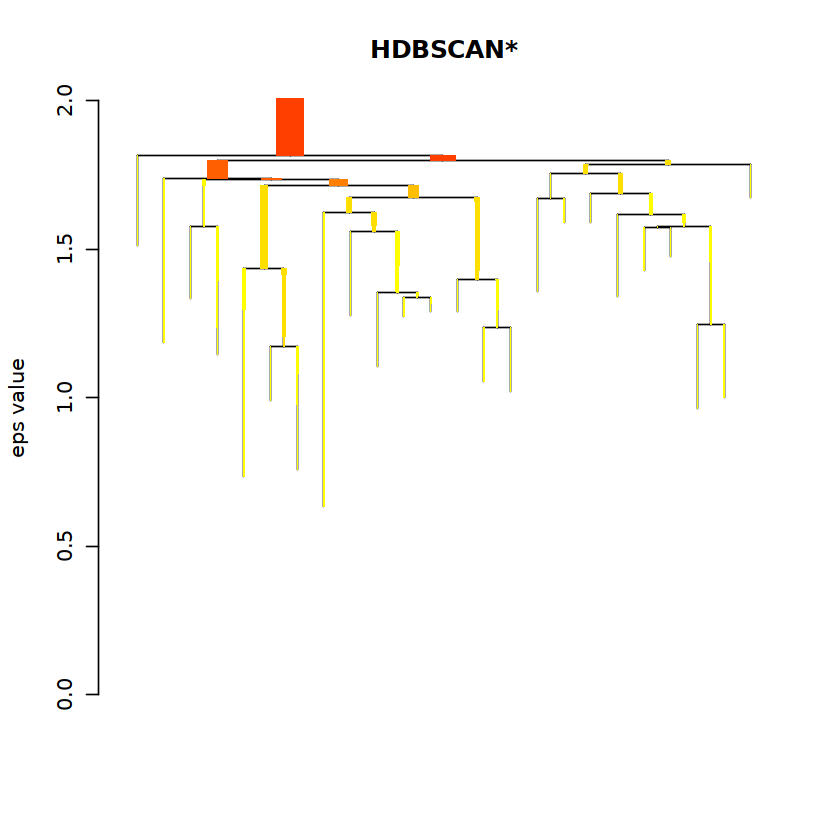

In [22]:
# Set number of minimum points according to the sample type analyzed
minPts <- 3

# Cluster
clust <- hdbscan(dist(df_corr_filt, method = 'euclidean'), minPts = minPts)

saveRDS(clust, file = paste0(wd,'/hbdscan_clust_object_',sample_type,'_minPts_',minPts,'.rds'))

plot(clust$hc, main="HDBSCAN* Hierarchy")

length(clust$cluster)

plot(clust, col = clust$cluster + 1L, cex = .5)


In [23]:
# Look at number of clusters and number of modules in each cluster. This should be relatively balanced.
# Modules assigned to cluster 0 are noise-points
clust

HDBSCAN clustering for 329 objects.
Parameters: minPts = 3
The clustering contains 18 cluster(s) and 50 noise points.

 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 
50  5  6  4 19 28 51 11  3 46 58  3  4  3  7  3  3 19  6 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

In [24]:
# Save module-cluster-assignments
mod_grouping <- as.data.frame(clust$cluster)
mod_grouping$module <- rownames(df_corr_filt)
colnames(mod_grouping) <- c('group','module')

#write.csv(mod_grouping, paste0(wd,'/module_groupings_hdbscan_',sample_type,'_minPts_',minPts,'.csv'), quote = F)


### Define consensus modules

In [25]:
# Convert all_scores to a data frame (in case it isn't already one)
all_scores <- as.data.frame(all_scores)

# Determine the number of groups based on the clustering results
n_groups <- max(clust$cluster)

# Initialize three empty lists to store consensus modules with different stringency levels
cons_mod_list <- vector("list", length = n_groups)
names(cons_mod_list) <-paste0("cons_mod_",c(1:n_groups))

cons_mod_list_loose <- vector("list", length = n_groups)
names(cons_mod_list_loose) <-paste0("cons_mod_",c(1:n_groups))

cons_mod_list_veryloose <- vector("list", length = n_groups)
names(cons_mod_list_veryloose) <-paste0("cons_mod_",c(1:n_groups))

# Loop over each group
for(i in c(1:n_groups)){

    group <- i # Current group index
    
    # Get module names that belong to the current group
    modules <- mod_grouping$module[mod_grouping$group == i]
    
    # Initialize variable to collect top genes across all modules in the group   
        for(j in 1:length(modules)){
                # Select the top 50 genes for the current module based on their score
                topgenes <- rownames(all_scores[order(all_scores[,modules[j]], decreasing = T),])[1:50]
            
            # Append top genes to the list for this group
            if(j == 1){
                topgenes_i <- topgenes
            }else{
                topgenes_i <- c(topgenes_i,topgenes)
            }

        }
        
        # Tabulate gene occurrences across modules in the group
        topgenes_i <- as.data.frame(table(topgenes_i))
        topgenes_i <- topgenes_i[order(topgenes_i$Freq, decreasing = T),]
        
        # Define cutoffs for consensus inclusion based on number of modules in group
        if(length(modules) == 2){
            occ_numb <- 2
            occ_numb_loose <- 1
            occ_numb_veryloose <- 1
        }else if(length(modules) == 3){
            occ_numb <- 2
            occ_numb_loose <- 2
            occ_numb_veryloose <- 1            
        }else{
            occ_numb <- length(modules)/3
            occ_numb_loose <- length(modules)/4
            occ_numb_veryloose <- length(modules)/6
        }        
        
        # Print the strict consensus cutoff value for logging/debugging  
        print(occ_numb)

        # Filter genes by their frequency across modules based on different thresholds
    
        topgenes_sel <- topgenes_i[topgenes_i$Freq >= occ_numb,] # Gene must be part of 1/3 of the modules in the cluster. In clusters of three modules, the gene must appear in two modules. In clusters of two modules, the gene must appear in both.
        
        topgenes_sel_loose <- topgenes_i[topgenes_i$Freq >= occ_numb_loose,] # Gene must be part of 1/4 of the modules in the cluster. In clusters of three modules, the gene must appear in two modules. In clusters of two modules, the gene must appear in one of them.
        
        topgenes_sel_veryloose <- topgenes_i[topgenes_i$Freq >= occ_numb_veryloose,] # Gene must be part of 1/6 of the modules in the cluster. In clusters of three modules, the gene must appear in one module. In clusters of two modules, the gene must appear in one of them.

    # Store the selected consensus genes (as character vectors) into respective lists
    cons_mod_list[[i]] <- as.character(topgenes_sel$topgenes_i)
    cons_mod_list_loose[[i]] <- as.character(topgenes_sel_loose$topgenes_i)
    cons_mod_list_veryloose[[i]] <- as.character(topgenes_sel_veryloose$topgenes_i)

    # Clean up temporary variables
    rm(topgenes_i)
    rm(topgenes_sel)
    rm(topgenes_sel_veryloose)

}


[1] 1.666667
[1] 2
[1] 1.333333
[1] 6.333333
[1] 9.333333
[1] 17
[1] 3.666667
[1] 2
[1] 15.33333
[1] 19.33333
[1] 2
[1] 1.333333
[1] 2
[1] 2.333333
[1] 2
[1] 2
[1] 6.333333
[1] 2


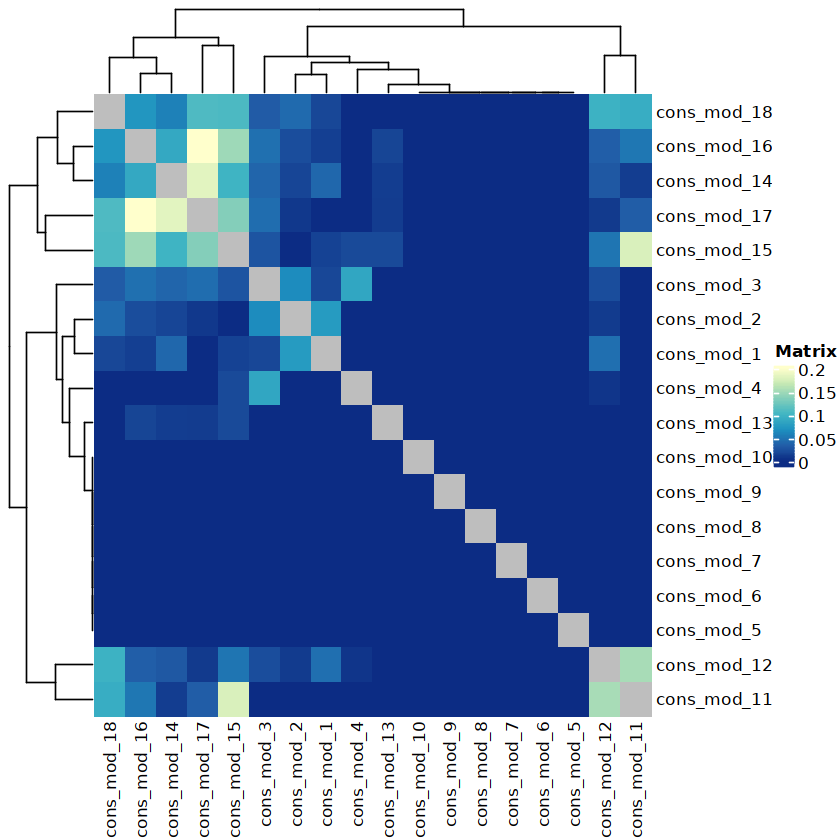

In [26]:
# Check level of overlap between modules
# Set stringency level for gene inclusion in consensus module
filter_type <- 'cons_mod_list_loose'
mod_list_i <- cons_mod_list_loose

# Create an empty dataframe to store the Jaccard coefficients
df_jacc <- data.frame(matrix(ncol = length(mod_list_i), nrow = length(mod_list_i)))
colnames(df_jacc) <- names(mod_list_i)
rownames(df_jacc) <- names(mod_list_i)

count <- 0
# Loop over all pairs of columns and compute the jaccard similarity
for (i in 1:length(mod_list_i)) {
  for (j in 1:length(mod_list_i)) {
      count <- count+1
    if (i == j) {
      df_jacc[i, j] <- NA  # set Jaccard of a column with itself to NA
    } else {
      # Get all genes from each module of interest
      names_1 <-  mod_list_i[[i]][!is.na(mod_list_i[[i]])]
      names_2 <-  mod_list_i[[j]][!is.na(mod_list_i[[j]])]
        
      # Calculate Jaccard index or set to 0, if one of the modules is empty
      if(length(names_1) == 0){
        df_jacc[i, j] <- 0
      }else if(length(names_2) == 0){
        df_jacc[i, j] <- 0
      }else{
        df_jacc[i, j] <- jaccard(names_1, names_2)
      }


    }
  }
}

# Plot Jaccard index as a measure for gene content overlap between consensus modules
hc <- hclust(dist(df_jacc))
df_corr_clustered <- df_jacc[rev(hc$order), rev(hc$order)]

pheatmap(as.matrix(df_corr_clustered),
          show_rownames = T, show_colnames = T,
          breaks = seq(0, max(df_corr_clustered[!is.na(df_corr_clustered)]), length = 100),
          color = colorRampPalette(rev(brewer.pal(n = 7, name = "YlGnBu")))(100),
          legend = T,
          border_color = NA
)


#### Choice of gene filtering stringency
A medium stringency threshold worked well in producing few consensus modules that overlap significantly (i.e. keeping consensus modules unique) and producing consensus modules with largely > 10 genes per module. Modules corresponding to this filter are save in 'cons_mod_list_loose' and are based on the following gene filter criteria: Gene must be part of 1/4 of the modules in the cluster. In clusters of three modules, the gene must appear in two modules. In clusters of two modules, the gene must appear in one of them.

### Name modules by function / gene content

In [29]:
# Special characters in gene names are sometimes altered, when working with Seurat. Make sure common special character combinations are written properly, so that gene names are accurately represented in GO-term analysis.
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("si\\.","si:",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("zgc\\.","zgc:",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("mt\\.","mt-",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("dkey\\.","dkey-",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("h211\\.","h211-",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("1073\\.","1073-",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("1073\\.","1073-",x))
cons_mod_list_loose <- lapply(cons_mod_list_loose, function(x) gsub("ch73\\.","ch73-",x))


In [30]:
# Print individual consensus module contents and assign name based on gene content and associated GO-terms (https://biit.cs.ut.ee/gprofiler/)

p <- 1

noquote(cons_mod_list_loose[[p]])


 [1] hand2           MYCN            fosab           nop56          
 [5] nop58           egr1            kdm6bb          phex           
 [9] phox2a          rnf44           tfap2b          znf865         
[13] atrx            ckbb            cxcl12a         dkc1           
[17] egr4            elavl4          fmnl3           fut9a          
[21] hmgb3a          irx6a           jun             kcnd2          
[25] marcksb         mtdha           nop2            ntrk3a         
[29] pho             rasd4           rn7sk           si:dkey-230p4.1
[33] si:dkey-56f14.7 slit3           sox4a.1         sp5a           
[37] tbx20           tfap2a          tmsb2           zbtb16a        
[41] zfhx3           zfhx4          

#### Notes on number of consensus modules recovered and module names

**pts_allindividually, filter_type <- 'cons_mod_list_loose', k = 18**  
 c('early_adrenergic_dev','neurogenesis','nervous_sys_dev_01','neural_ECM_interaction','cell_cycle',
    'cell_cycle','muscle_process','contamination_mucin_cells','contamination_immune_cells','interferon_signaling',
    'catecholamine_production','catecholamine_production','glycolysis_gluconeogenesis','stress_response','catecholamine_production',
    'tissue_dev_sensory','heat_shock_response','oxPhos_mitochondrial')


**multis_allindividually, filter_type <- 'cons_mod_list_loose', k = 10**  
 c('neural_axonal_proteins','nervous_sys_dev_mito','muscle_like','immune_contam','heat_shock',
   'cell_cycle','cell_cycle','interferon_sig','neural_TNFA_NFKB','immature_neuronal')


**lateallos_allindividually, cons_mod_list_loose, k = 10**  
 c('MYCN_oxphos','amino_acid_met','stress_response_with_heat','neural_axonal','cell_cycle'
  'undetermined','NC_like','ECM_components','immune_contam','immune_activation')


**earlyallos_allindividually, cons_mod_list_loose, k = 7**  
 c('interferon_sig','muscle_tissue_dev','muscle_process_2',cell_cycle,'ery_contam', 'tissue_dev','stress_response_with_heat')


In [31]:
chosen_list <- cons_mod_list_loose

filter_type <- 'cons_mod_list_loose'

sample_type

[1] "pts_allindividually"

In [32]:
# Name modules in list and save
names(chosen_list) <-  c('early_adrenergic_dev','neurogenesis','nervous_sys_dev_01','neural_ECM_interaction','cell_cycle',
                         'cell_cycle','muscle_process','contamination_mucin_cells','contamination_immune_cells','interferon_signaling',
                         'catecholamine_production','catecholamine_production','glycolysis_gluconeogenesis','stress_response','catecholamine_production',
                         'tissue_dev_sensory','heat_shock_response','oxPhos_mitochondrial'
                         )
                         
saveRDS(chosen_list, file = paste0(wd,'/cons_mod_list_all_',sample_type,'_filtType_',filter_type,'_hdbscan.rds'))


### Merge modules assigned the same function
This is done based on identical names given to modules in the names of the list.

In [33]:
# Assign the input list (chosen_list) to a working variable
lst <- chosen_list

# Initialize an empty list to store the merged results
merged_list <- list()

# Get the unique names (keys) from the list to determine which elements need to be merged
names_to_merge <- unique(names(lst))

# Loop through each unique name
  for (name in names_to_merge) {
      
    # If there is only one entry in the list with this name, assign it directly to the merged list
     if(length(lst[names(lst) == name]) == 1){
         merged_list[[name]] <- lst[[name]]
     }else{
        # If there are multiple entries with the same name, merge them
        
        # Extract all vectors with the current name
         matching_vectors <- lst[names(lst) == name]
         
        # Flatten the list of vectors into a single vector
         combined_vector <- unlist(matching_vectors)
         
        # Create a frequency table of the combined vector
         combined_vector <- as.data.frame(table(combined_vector))
         
        # Sort the table in descending order of frequency
         combined_vector <- combined_vector[order(combined_vector$Freq, decreasing = T),]
        
        # Store the sorted gene names (as character vector) in the merged list
          merged_list[[name]] <- as.character(combined_vector$combined_vector)
      }
  }

### Remove duplicated genes from modules
The top gene in the module is always kept. Each other gene is kept only in the earliest rank it appears across modules. If a gene shows up later (i.e., at a lower rank) in another module, that later occurrence is removed. The first gene flagged as duplicated in each module is kept. Same-rank duplicates across modules are kept.

In [37]:
# First remove empty modules
cons_mod_list_filt  <- merged_list[!names(merged_list) %in% names(merged_list[lengths(merged_list) == 0])]

cons_mod_list_filt_short <- cons_mod_list_filt

# Iterate over each element (list) in 'cons_mod_list_filt'
for(i in 1:length(cons_mod_list_filt)){

    geneRanks_forMod_i <- cons_mod_list_filt[[i]]
    gene_counter <- 0
    
    # Iterate over the gene rankings from the second element onwards
    for(j in 2:length(geneRanks_forMod_i)){
    
        # Extract all elements from other lists (except the current one) up to (j-1) positions
        encountered_elements <- unlist(lapply(cons_mod_list_filt[-i], `[`, 1:(j-1)))
        gene_dup <- 0

        # Check if the current gene exists in previously encountered elements
        if(geneRanks_forMod_i[j] %in% encountered_elements){
            gene_counter <- gene_counter + 1
            gene_dup <- 1
        }
        
        # If the gene is not a duplicate, continue to the next iteration
        if(gene_dup == 0){
            next
        }else if((gene_counter == 0) && (gene_dup == 1)){
        # If this is the first duplicate, skip processing
            next
        }else{
        # Replace duplicate gene with NA instead of stopping at first occurrence
            #cons_mod_list_filt_short[[i]] <- cons_mod_list_filt[[i]][1:(j-1)]
            #break
            cons_mod_list_filt_short[[i]][j] <- NA
        }

    }
}

cons_mod_list_filt_short <- lapply(cons_mod_list_filt_short, function(x) x[!is.na(x)])

In [38]:
# Print out final list of modules
cons_mod_list_filt_short


$early_adrenergic_dev
 [1] "hand2"           "MYCN"            "fosab"           "nop56"          
 [5] "nop58"           "egr1"            "kdm6bb"          "phex"           
 [9] "phox2a"          "rnf44"           "tfap2b"          "znf865"         
[13] "atrx"            "ckbb"            "cxcl12a"         "dkc1"           
[17] "fmnl3"           "fut9a"           "hmgb3a"          "irx6a"          
[21] "kcnd2"           "marcksb"         "mtdha"           "nop2"           
[25] "pho"             "rasd4"           "rn7sk"           "si:dkey-230p4.1"
[29] "si:dkey-56f14.7" "slit3"           "sox4a.1"         "sp5a"           
[33] "tbx20"           "tfap2a"          "tmsb2"           "zbtb16a"        
[37] "zfhx4"          

$neurogenesis
 [1] "stmn1b"           "stmn4l"           "elavl4"           "rtn1a"           
 [5] "si:ch73-46j18.5"  "tuba1c"           "tubb5"            "cnp"             
 [9] "elavl3"           "gpm6aa"           "marcksl1a"        "nfil3.5"         
[13] "nrp1a"            "si:ch211-56a11.2" "stmn2a"           "stmn4"           
[17] "tuba1a"           "aff2"             "gpm6ab"           "kif1aa"          
[21] "klf7b"            "marcksa"          "nfil3"            "nova2"           
[25] "pbx1a"            "pimr138"          "ppp1r14ba"        "si:dkey-56m19.5" 
[29] "tmem178b"         "ttyh3b"           "camta1b"          "cd99l2"          
[33] "fxyd6"            "fxyd6l"           "gad2"             "h3f3d"           
[37] "hsp90ab1"         "map1aa"           "maptb"            "mcama"           
[41] "ptpn5"            "rtn1b"            "sez6l2"           "si:ch211-214c7.4"
[45] "tcf12"           

$nervous_sys_dev_01
  [1] "adam8a"           "midn"             "pnrc2"           
  [4] "zfhx3"            "camk2n1a"         "CR318588.4"      
  [7] "CR383676.1"       "gata3"            "irs2b"           
 [10] "krt15"            "ntrk3a"           "pknox2"          
 [13] "ptmaa"            "pyya"             "sstr1a"          
 [16] "tagln2"           "vgf"              "abhd15a"         
 [19] "adcyap1r1a"       "cadm3"            "clstn2"          
 [22] "igfbp5b"          "itm2cb"           "kidins220a"      
 [25] "map1b"            "neo1b"            "nrp2b"           
 [28] "si:dkey-175g6.2"  "sost"             "ackr4b"          
 [31] "adad2"            "ADAMTSL4"         "ARFGAP1"         
 [34] "BX248410.2"       "ccdc88b"          "cemip"           
 [37] "cep89"            "chrna2b"          "cldnc"           
 [40] "cnga3a"           "CR354556.3"       "CR388168.2"      
 [43] "CR792439.1"       "CR847906.1"       "CT573429.2"      
 [46] "cyp2aa8"          "dchs1a"           "dusp6"           
 [49] "ebf3a"            "fam131bb"         "fam13b"          
 [52] "fam43b"           "flrt1b"           "flt3"            
 [55] "fn1a"             "foxp4"            "FP102170.1"      
 [58] "gnpda1"           "golim4b"          "grm4"            
 [61] "hoxb8a"           "ism2a"            "kcnj2a"          
 [64] "lrrtm2"           "map7d2b"          "mat2ab"          
 [67] "mmp2"             "pbx3b"            "pdp1"            
 [70] "peli1a"           "plag1"            "plod2"           
 [73] "ppiaa"            "ppp1r27b"         "ptprk"           
 [76] "rassf7b"          "rbfox1"           "rbp1"            
 [79] "robo1"            "shox2"            "si:ch211-156b7.5"
 [82] "si:ch211-222k6.2" "si:ch211-71k14.1" "si:dkey-105i14.1"
 [85] "si:dkey-112m2.1"  "si:dkey-191g9.7"  "si:dkey-31f5.11" 
 [88] "si:dkeyp.67f1.2"  "SMIM18"           "sox11b"          
 [91] "TENM2"            "tmsb4x"           "tnfrsf9a"        
 [94] "tsku"             "ttc38"            "unc93b1"         
 [97] "uncx"             "viml"             "wscd1b"          
[100] "zgc:173552.2"     "zgc:85975"       

$neural_ECM_interaction
 [1] "insl5a"         "pnoca"          "postna"         "ret"           
 [5] "col12a1b"       "kctd12.2"       "avpr1ab"        "ccl19a.1"      
 [9] "ntrk3b"    

In [ ]:
# Save module list

saveRDS(cons_mod_list_filt_short, file = paste0(wd,'/filtered_cons_mod_list_filtered_',sample_type,'_filtType_',filter_type,'_hdbscan.rds'))


In [ ]:
# Save modules in dataframe format

mod_list <- readRDS(file = paste0(wd,'/filtered_cons_mod_list_filtered_',sample_type,'_filtType_',filter_type,'_hdbscan.rds'))

nobs <- sapply(mod_list, length)
seqmax <- seq_len(max(nobs))
mod_mat <- as.data.frame(sapply(mod_list, "[", i = seqmax))

write.table(mod_mat, paste0(wd,'/filtered_cons_mod_table_filtered_',sample_type,'_filtType_',filter_type,'_hdbscan.csv'), quote = F, sep = ',')
    

#### Plot gene content overlap of final modules

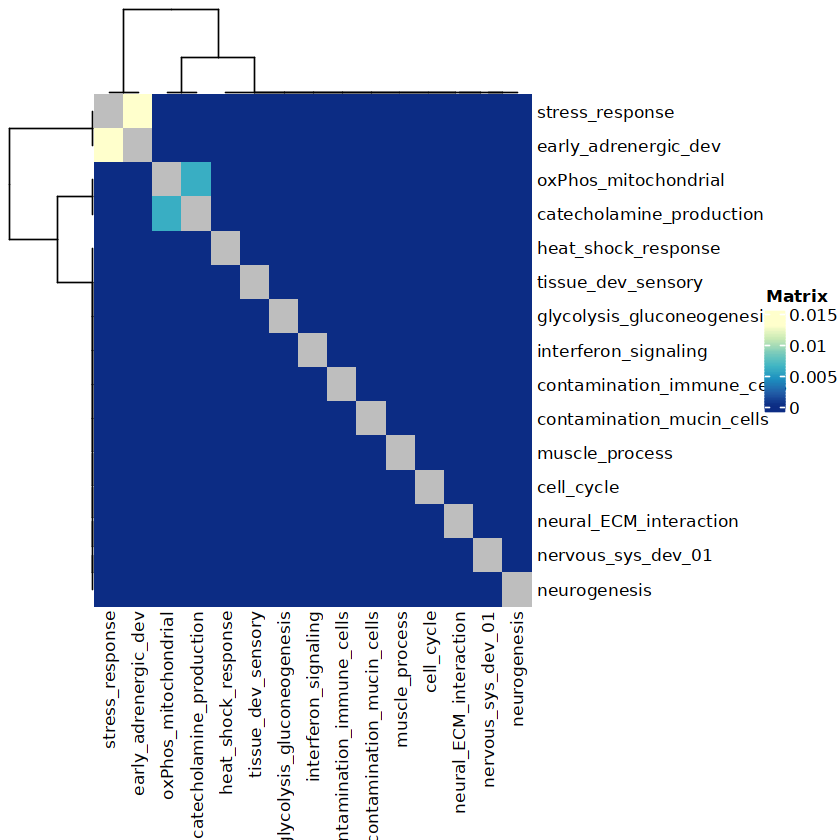

In [39]:
mod_list_i <- cons_mod_list_filt_short

# Create an empty dataframe to store the Jaccard coefficients
df_jacc <- data.frame(matrix(ncol = length(mod_list_i), nrow = length(mod_list_i)))
colnames(df_jacc) <- names(mod_list_i)
rownames(df_jacc) <- names(mod_list_i)


count <- 0
# Loop over all pairs of columns and compute the jaccard similarity
for (i in 1:length(mod_list_i)) {
  for (j in 1:length(mod_list_i)) {
      count <- count+1
    if (i == j) {
      df_jacc[i, j] <- NA  # set Jaccard of a column with itself to NA
    } else {
      # Get all genes from each module of interest
      names_1 <-  mod_list_i[[i]][!is.na(mod_list_i[[i]])]
      names_2 <-  mod_list_i[[j]][!is.na(mod_list_i[[j]])]
        
      # Calculate Jaccard index or set to 0, if one of the modules is empty
      if(length(names_1) == 0){
        df_jacc[i, j] <- 0
      }else if(length(names_2) == 0){
        df_jacc[i, j] <- 0
      }else{
        df_jacc[i, j] <- jaccard(names_1, names_2)
      }


    }
  }
}


hc <- hclust(dist(df_jacc))
df_corr_clustered <- df_jacc[rev(hc$order), rev(hc$order)]

    pheatmap(as.matrix(df_corr_clustered),
      show_rownames = T, show_colnames = T,
      breaks = seq(0, max(df_corr_clustered[!is.na(df_corr_clustered)]), length = 100),
      color = colorRampPalette(rev(brewer.pal(n = 7, name = "YlGnBu")))(100),
      legend = T,
      border_color = NA
    )

**Conclusion**
This approach yields modules largely non-overlapping in gene content. Top contributing genes however, are kept for all modules, meaning a small overlap in genes is still possible (see plot above).

### Visualizing module clustering and consensus assignment

#### T-SNE / UMAP on modules and correlations

Parameters used for individual datasets to set variables below.

|sample_type|minPts|filter_type|
|--|--|--|
|pts_allindividually|3|cons_mod_list_loose|
|multis_allindividually|3|cons_mod_list_loose|
|lateallos_allindividually|2|cons_mod_list_loose|
|earlyallos_allindividually|2|cons_mod_list_loose|

In [40]:
# Set parameters for data to plot
sample_type <- 'pts_allindividually'
filter_type <- 'cons_mod_list_loose'
minPts <- 3

In [41]:
# RELOAD DATA
if(sample_type == 'all'){
    
    sample_types <- c('pts_allindividually','multis_allindividually','earlyallos_allindividually','lateallos_allindividually')
    minPts_vals <- c(3,3,2,2)
    prefixes <- c('single_primary','multi_primary','early_graft','late_graft')
    filter_type <- 'cons_mod_list_loose'
    
    mod_grouping_all <- data.frame()
    df_corr_filt_all <- data.frame()
    
    for(i in 1:length(sample_types)){
    
        type <- sample_types[i]
        minPts <- minPts_vals[i]
        prefix <- prefixes[i]
        
        chosen_list <- readRDS(paste0(wd,'cons_mod_list_all_',type,'_filtType_',filter_type,'_hdbscan.rds'))

        group_names <- as.data.frame(names(chosen_list))
        group_names$group <- c(1:nrow(group_names))
        colnames(group_names) <- c('name','group')

        mod_grouping <- read.delim(paste0(wd,'module_groupings_hdbscan_',type,'_minPts_',minPts,'.csv'), stringsAsFactors = F,
                                   sep = ',', row.names = 1)

        mod_grouping <- left_join(mod_grouping, group_names, by = 'group')
        mod_grouping$name[!is.na(mod_grouping$name)] <- paste0(prefix,'_',mod_grouping$name[!is.na(mod_grouping$name)])
    
        mod_grouping_all <- rbind(mod_grouping_all, mod_grouping)
        rm(chosen_list)
        rm(mod_grouping)
        
        df_corr_filt <- read.delim(wd,'filtered_module_df_all_TPs_allindividually.csv', stringsAsFactors = F, sep = ',', row.names = 1)
        
    }
    
    mod_grouping <- mod_grouping_all
    df_corr_filt <- df_corr_filt[mod_grouping_all$module, mod_grouping_all$module]
    
}else{

    chosen_list <- readRDS(paste0(wd,'cons_mod_list_all_',sample_type,'_filtType_',filter_type,'_hdbscan.rds'))

    group_names <- as.data.frame(names(chosen_list))
    group_names$group <- c(1:nrow(group_names))
    colnames(group_names) <- c('name','group')

    mod_grouping <- read.delim(paste0(wd,'module_groupings_hdbscan_',sample_type,'_minPts_',minPts,'.csv'), stringsAsFactors = F,
                               sep = ',', row.names = 1)

    mod_grouping <- left_join(mod_grouping, group_names, by = 'group')

}


if(sample_type == 'multis_allindividually'){

    mod_grouping$name <- paste0('Multi_',mod_grouping$name)
}

##### Run T-SNE, PCA and UMAP

In [42]:
# T-SNE
if(sample_type == 'earlyallos_allindividually'){
    tsne_dat <- Rtsne(
      df_corr_filt,
        perplexity = 5)
}else{
    tsne_dat <- Rtsne(
      df_corr_filt)
}

tsne_plot <- as.data.frame(tsne_dat$Y)
rownames(tsne_plot) <- rownames(df_corr_filt)

In [43]:
# PCA
pca_dat <- princomp(
  df_corr_filt)

pca_plot <- as.data.frame(pca_dat$scores)

In [44]:
# UMAP
umap <- umap(
  df_corr_filt,
  n_neighbors = 3,
  n_components = 2,
  metric = "euclidean")

umap_plot <- as.data.frame(umap)

In [45]:
# Prepare plots
colnames(umap_plot) <- c('UMAP_1','UMAP_2')
umap_plot$module <- rownames(umap_plot)

pca_plot$module <- rownames(pca_plot)

colnames(tsne_plot) <- c('TSNE_1','TSNE_2')
tsne_plot$module <- rownames(tsne_plot)


umap_plot <- left_join(umap_plot, mod_grouping, by = 'module')
pca_plot <- left_join(pca_plot, mod_grouping, by = 'module')
tsne_plot <- left_join(tsne_plot, mod_grouping, by = 'module')

##### Plot T-SNE

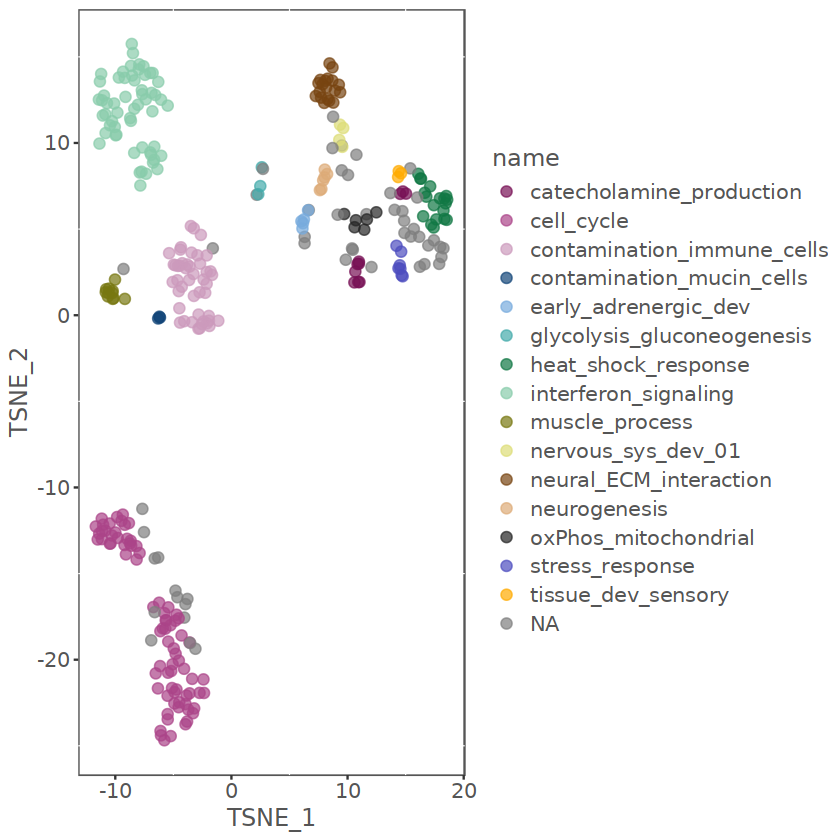

In [46]:

colors_large <- colorRampPalette(c(
    brewer.pal(n = 9, name = "YlOrBr")[c(2,5,7,9)],
    brewer.pal(n = 9, name = "Reds")[c(2,3,5,7)],
    brewer.pal(n = 9, name = "Purples")[c(3,5,7,9)],
    brewer.pal(n = 9, name = "Blues")[c(2,4,6,8)],
    brewer.pal(n = 9, name = "Greens")[c(2,4,5,7,8,9)],
'black'))(length(unique(umap_plot$name)))



if(sample_type == 'all'){
    print(
        ggplot(as.data.frame(tsne_plot), aes(x = TSNE_1, y = TSNE_2)) +
            geom_point(aes(color = name, shape = sample_type), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(colors_large[1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )

}else{
    print(
        ggplot(as.data.frame(tsne_plot), aes(x = TSNE_1, y = TSNE_2)) +
            geom_point(aes(color = name), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(tol21rainbow[c(1,2,3,4,6,8,10,12,13,15,16,18,24,31,30)][1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )

}


##### Plot UMAP

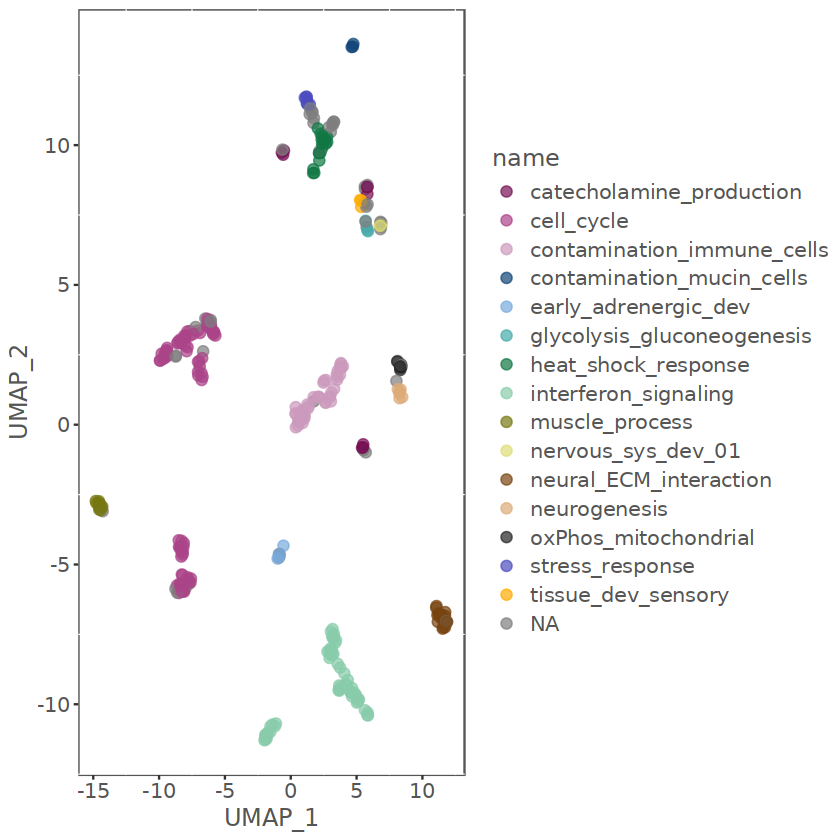

In [49]:

colors_large <- colorRampPalette(c(
    brewer.pal(n = 9, name = "YlOrBr")[c(2,5,7,9)],
    brewer.pal(n = 9, name = "Reds")[c(2,3,5,7)],
    brewer.pal(n = 9, name = "Purples")[c(3,5,7,9)],
    brewer.pal(n = 9, name = "Blues")[c(2,4,6,8)],
    brewer.pal(n = 9, name = "Greens")[c(2,4,5,7,8,9)],
'black'))(length(unique(umap_plot$name)))


if(sample_type == 'all'){
    print(
        ggplot(as.data.frame(umap_plot), aes(x = UMAP_1, y = UMAP_2)) +
            geom_point(aes(color = name, shape = sample_type), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(colors_large[1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )

}else{
    print(
        ggplot(as.data.frame(umap_plot), aes(x = UMAP_1, y = UMAP_2)) +
            geom_point(aes(color = name), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(tol21rainbow[c(1,2,3,4,6,8,10,12,13,15,16,18,24,31,30)][1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )
}

##### Plot PCA

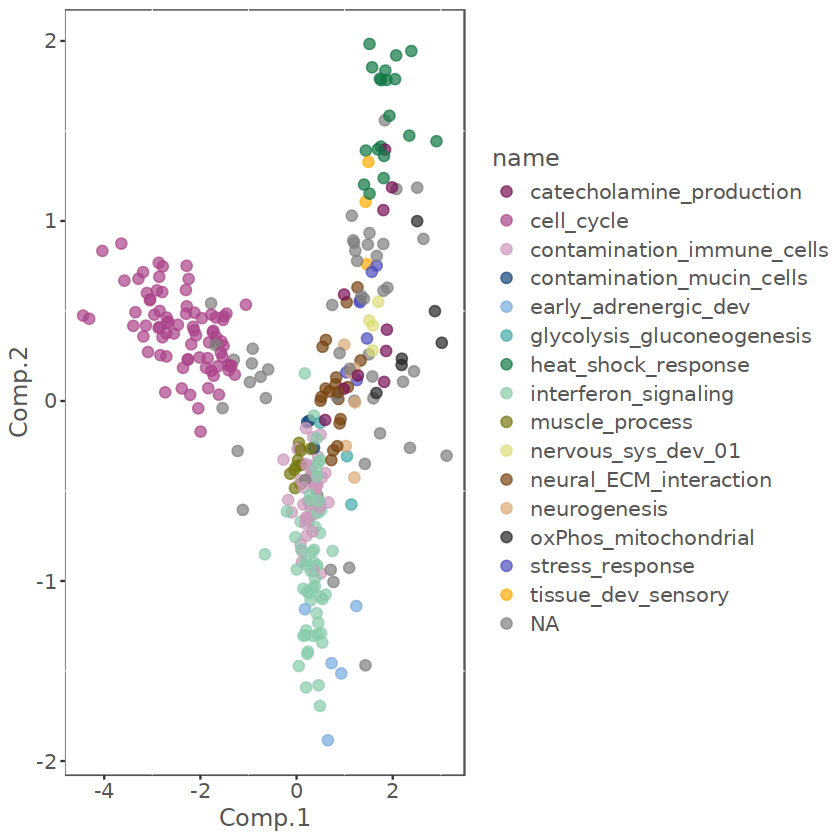

In [48]:

colors_large <- colorRampPalette(c(
    brewer.pal(n = 9, name = "YlOrBr")[c(2,5,7,9)],
    brewer.pal(n = 9, name = "Reds")[c(2,3,5,7)],
    brewer.pal(n = 9, name = "Purples")[c(3,5,7,9)],
    brewer.pal(n = 9, name = "Blues")[c(2,4,6,8)],
    brewer.pal(n = 9, name = "Greens")[c(2,4,5,7,8,9)],
'black'))(length(unique(umap_plot$name)))


if(sample_type == 'all'){
    print(
        ggplot(as.data.frame(pca_plot), aes(x = Comp.1, y = Comp.2)) +
            geom_point(aes(color = name, shape = sample_type), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(colors_large[1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )

}else{
    print(
        ggplot(as.data.frame(pca_plot), aes(x = Comp.1, y = Comp.2)) +
            geom_point(aes(color = name), size = 2.5, alpha = 0.7, position = position_jitter(width = 0.15, height = 0.15, seed = 1)) +
            scale_color_manual(values = c(tol21rainbow[c(1,2,3,4,6,8,10,12,13,15,16,18,24,31,30)][1:length(unique(umap_plot$name))-1],'#f0f0f0')) +
            mytheme_basic
    )
}

#### Heatmaps

Parameters used for individual datasets to set variables below.

|sample_type|minPts|filter_type|
|--|--|--|
|pts_allindividually|3|cons_mod_list_loose|
|multis_allindividually|3|cons_mod_list_loose|
|lateallos_allindividually|2|cons_mod_list_loose|
|earlyallos_allindividually|2|cons_mod_list_loose|

In [53]:
# Set parameters for data to plot
sample_type <- 'pts_allindividually'
filter_type <- 'cons_mod_list_loose'
minPts <- 3

In [55]:
# Reload data
if(sample_type == 'all'){
    
    sample_types <- c('pts_allindividually','multis_allindividually','earlyallos_allindividually','lateallos_allindividually')
    minPts_vals <- c(3,3,2,2)
    prefixes <- c('single_primary','multi_primary','early_graft','late_graft')
    filter_type <- 'cons_mod_list_loose'
    
    mod_grouping_all <- data.frame()
    df_corr_filt_all <- data.frame()
    
    for(i in 1:length(sample_types)){
    
        type <- sample_types[i]
        minPts <- minPts_vals[i]
        prefix <- prefixes[i]
        
        chosen_list <- readRDS(paste0(wd,'cons_mod_list_all_',type,'_filtType_',filter_type,'_hdbscan.rds'))

        group_names <- as.data.frame(names(chosen_list))
        group_names$group <- c(1:nrow(group_names))
        colnames(group_names) <- c('name','group')

        mod_grouping <- read.delim(paste0(wd,'module_groupings_hdbscan_',type,'_minPts_',minPts,'.csv'), stringsAsFactors = F,
                                   sep = ',', row.names = 1)

        mod_grouping <- left_join(mod_grouping, group_names, by = 'group')
        mod_grouping$name[!is.na(mod_grouping$name)] <- paste0(prefix,'_',mod_grouping$name[!is.na(mod_grouping$name)])
    
        mod_grouping_all <- rbind(mod_grouping_all, mod_grouping)
        rm(chosen_list)
        rm(mod_grouping)
        
        df_corr_filt <- read.delim(wd,'filtered_module_df_all_TPs_allindividually.csv', stringsAsFactors = F, sep = ',', row.names = 1)
        
    }
    
    mod_grouping <- mod_grouping_all
    df_corr_filt <- df_corr_filt[mod_grouping_all$module, mod_grouping_all$module]
    
}else{

    chosen_list <- readRDS(paste0(wd,'cons_mod_list_all_',sample_type,'_filtType_',filter_type,'_hdbscan.rds'))

    group_names <- as.data.frame(names(chosen_list))
    group_names$group <- c(1:nrow(group_names))
    colnames(group_names) <- c('name','group')

    mod_grouping <- read.delim(paste0(wd,'module_groupings_hdbscan_',sample_type,'_minPts_',minPts,'.csv'), stringsAsFactors = F,
                               sep = ',', row.names = 1)

    mod_grouping <- left_join(mod_grouping, group_names, by = 'group')

}


if(sample_type == 'multis_allindividually'){

    mod_grouping$name <- paste0('Multi_',mod_grouping$name)
}


mod_grouping_filteredout <- as.data.frame(rownames(df_corr_filt))
mod_grouping_filteredout$group <- NA
mod_grouping_filteredout$name <- NA
colnames(mod_grouping_filteredout) <- c('module','group','name')
mod_grouping_filteredout <- mod_grouping_filteredout[,c('group','module','name')]
mod_grouping_filteredout <- mod_grouping_filteredout[!mod_grouping_filteredout$module %in% mod_grouping$module,]

mod_grouping <- rbind(mod_grouping, mod_grouping_filteredout)
mod_grouping$sample <- gsub('(.*)_\\w+', '\\1', mod_grouping$module)

In [58]:
# Transfer consensus module assignments to modules in original correlation matrix

df_corr_filt_ext <- df_corr_filt
df_corr_filt_ext$module <- rownames(df_corr_filt_ext)
df_corr_filt_ext <- left_join(df_corr_filt_ext, groups_df, by = "module")
rownames(df_corr_filt_ext) <- df_corr_filt_ext$module


In [64]:
# Get a table of original module name and assigned consensus module

groups_df <- mod_grouping
rownames(groups_df) <- groups_df$module

names_vec <- as.data.frame(groups_df$name)
rownames(names_vec) <- groups_df$module
colnames(names_vec) <- 'Cons_mod'

names_vec$Cons_mod[is.na(names_vec$Cons_mod)] <- 'NA'


In [65]:
# Get naming vectors for plots
mod_names_vec <- sort(unique(names_vec$Cons_mod))
mod_names_vec <- factor(mod_names_vec, levels = c(mod_names_vec[mod_names_vec != 'NA'], 'NA'))
names_vec$Cons_mod <- factor(as.character(names_vec$Cons_mod), levels = c(sort(unique(names_vec$Cons_mod[names_vec$Cons_mod != 'NA'])), 'NA'))

names_vec_sample <- as.data.frame(groups_df$sample)
rownames(names_vec_sample) <- groups_df$module
colnames(names_vec_sample) <- 'Sample'


Warning message:
“The input is a data frame, convert it to the matrix.”
Warning message:
“The input is a data frame, convert it to the matrix.”


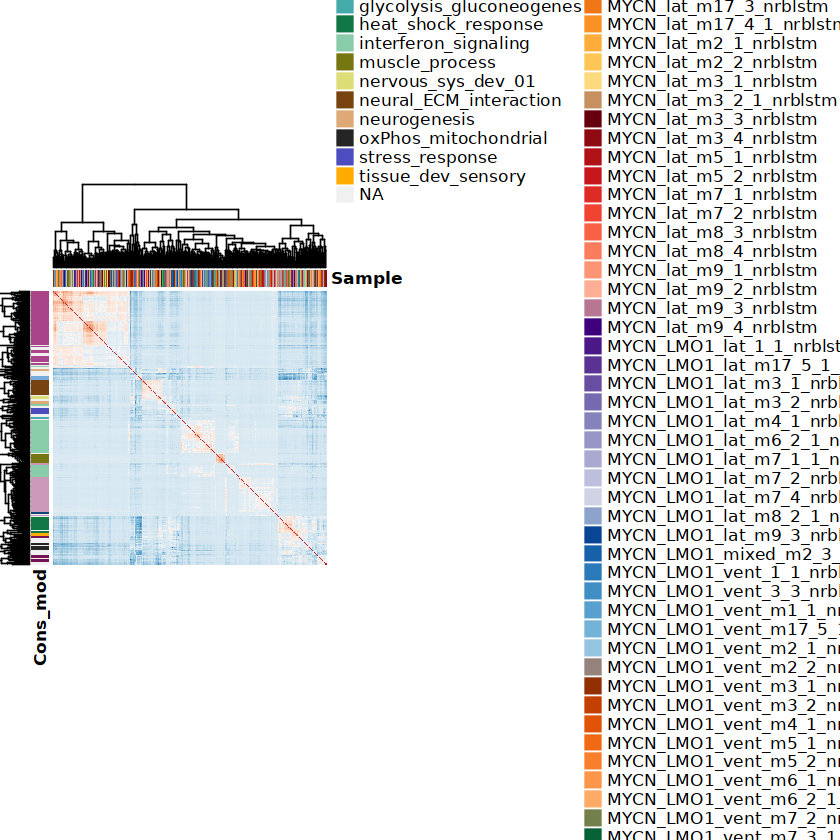

Warning message:
“The input is a data frame, convert it to the matrix.”


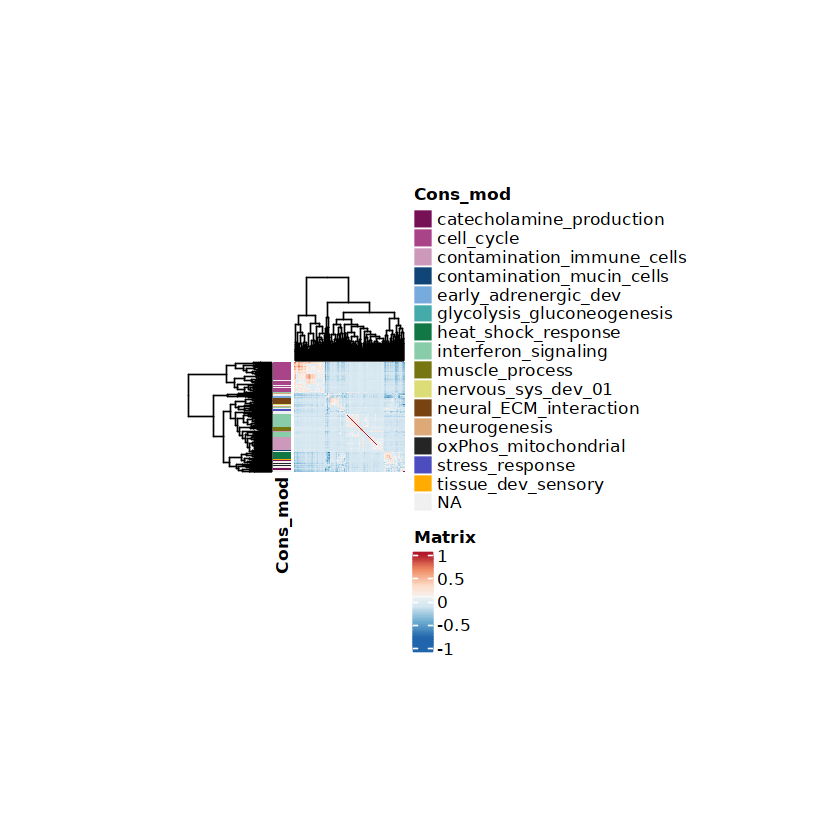

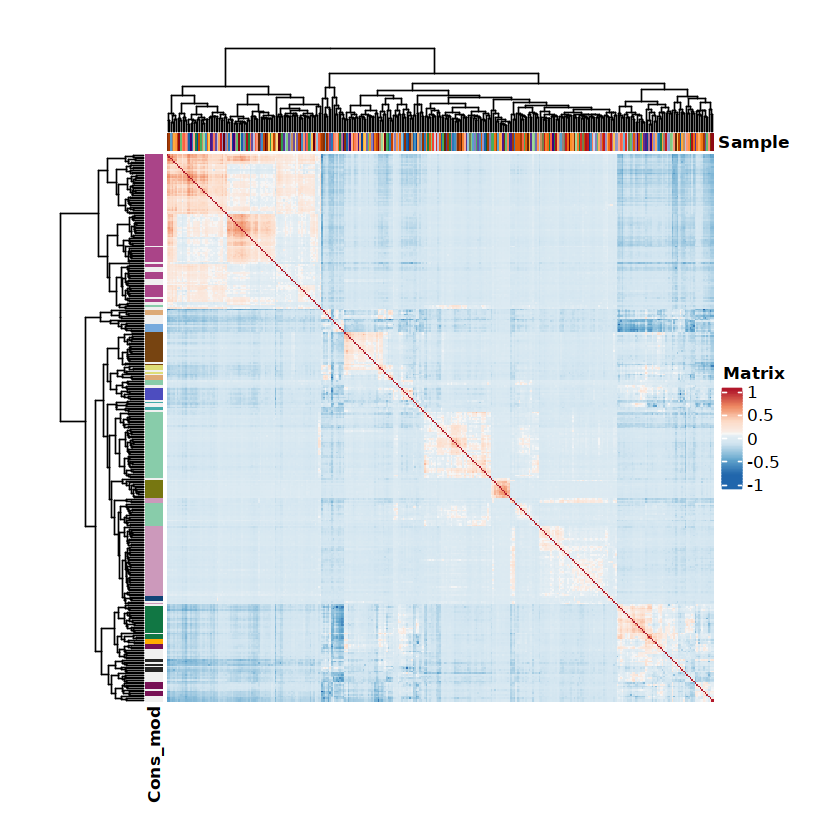

In [73]:
name_col <- c(tol21rainbow[c(1,2,3,4,6,8,10,12,13,15,16,18,24,31,30)][1:length(unique(groups_df$name))-1],'#f0f0f0')
names(name_col) <- levels(mod_names_vec)

name_col_sample <- colorRampPalette(
                c((rev(brewer.pal(n = 9, name = "YlOrBr")))[c(1:7)],
                (rev(brewer.pal(n = 9, name = "Reds")))[c(1:7)],
                (rev(brewer.pal(n = 9, name = "Purples")))[c(1:7)],
                (rev(brewer.pal(n = 7, name = "Blues")))[c(1:5)],
                (rev(brewer.pal(n = 7, name = "Oranges")))[c(1:5)],
                (rev(brewer.pal(n = 7, name = "Greens")))[c(1:5)]
                )
                )(length(unique(groups_df$sample)))

names(name_col_sample) <- sort(unique(groups_df$sample))

ann_colors = list(
    Cons_mod = name_col,
    Sample = name_col_sample
)




if(sample_type %in% c('multis_allindividually','lateallos_allindividually','earlyallos_allindividually')){
    
    print(
     pheatmap(df_corr_filt,
          show_rownames = F, show_colnames = F,
          breaks = seq(min(df_corr_filt[!is.na(df_corr_filt)]), max(df_corr_filt[!is.na(df_corr_filt)]), length = 100),
          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(110)[c(1:48,54,56,61:110)],
          annotation_row = names_vec,
          annotation_col = names_vec_sample, 
          annotation_colors = ann_colors,
          legend = F,
          border_color = NA,
          cellwidth = 3, cellheight = 3
        )
    )


}else{

    print(
     pheatmap(df_corr_filt,
          show_rownames = F, show_colnames = F,
          breaks = seq(min(df_corr_filt[!is.na(df_corr_filt)]), max(df_corr_filt[!is.na(df_corr_filt)]), length = 100),
          color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(110)[c(1:48,54,56,61:110)],
          annotation_row = names_vec,
          annotation_col = names_vec_sample, 
          annotation_colors = ann_colors,
          legend = F,
          border_color = NA,
          cellwidth = 0.5, cellheight = 0.5
        )
    )


}


print(
 pheatmap(df_corr_filt,
      show_rownames = F, show_colnames = F,
      breaks = seq(min(df_corr_filt[!is.na(df_corr_filt)]), max(df_corr_filt[!is.na(df_corr_filt)]), length = 100),
      color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(110)[c(1:48,54,56,61:110)],
      annotation_row = names_vec,
      #annotation_col = names_vec_sample,
      annotation_colors = ann_colors,
      legend = T,
      border_color = NA,
      cellwidth = 0.2, cellheight = 0.2

    )
)


print(
 pheatmap(df_corr_filt,
      show_rownames = F, show_colnames = F,
      breaks = seq(min(df_corr_filt[!is.na(df_corr_filt)]), max(df_corr_filt[!is.na(df_corr_filt)]), length = 100),
      color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(110)[c(1:48,54,56,61:110)],
      annotation_colors = ann_colors,
      annotation_row = names_vec,
      annotation_col = names_vec_sample, 
      annotation_legend = F,
      border_color = NA,
      cellwidth = 1, cellheight = 1

    )
)
